# Patch Prediction for Image File

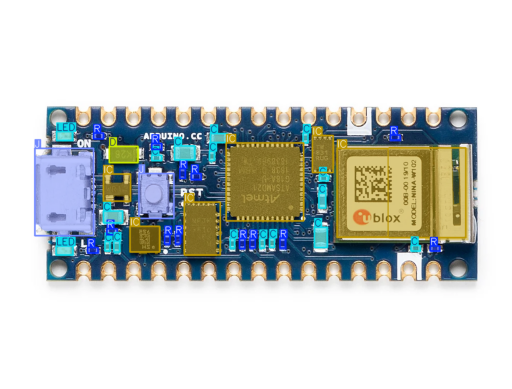

In [2]:
from yolo_predict import YoloPredictor
import cv2
import matplotlib.pyplot as plt

# files and directories
input_file_name = "b1"
input_file = "Testimages\\b1.webp"
output_directory = "Predictions"
yolomodel = "../models/yolov8m_updated_labels.pt"

# Whether the prediction should be used on the images as a whole
#  or split the image in patches beforehand.
#   (should be False for Net 1 and True for Net 2, 3 and 4)
patches = True

#Set line width for bounding boxes and font size
line_width_in = 2
font_size_in = 2

# create an instance of the Predictor
predictor = YoloPredictor(yolomodel, input_file, output_directory)
predictor.predict_file(patches, line_width_in, font_size_in)

image = cv2.imread(f'{output_directory}\\__CUT\\{input_file_name}_Cut.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

# Patch Prediction for Image Folder

In [4]:
from yolo_predict import YoloPredictor
import glob
import pathlib
from tqdm import tqdm

# files and directories
input_folder = "Testimages"

#Set line width for bounding boxes and font size
line_width_in = 1
font_size_in = 1

# Whether the prediction should be used on the images as a whole
#  or split the image in patches beforehand.
#   (should be False for Net 1 and True for Net 2, 3 and 4)
patches = True

#output_directory = f"OUTPUT/ORIGINAL/{input_folder}"
#yolomodel = "../models/yolov8s_original_labels.pt"     #Model 1



#output_directory = f"OUTPUT/PATCHES/{input_folder}"
#yolomodel = "../models/yolov8m_original_labels.pt"     #Model 2

output_directory = f"OUTPUT/UPDATED/{input_folder}"
yolomodel = "../models/yolov8m_updated_labels.pt"      #Model 3

#output_directory = f"OUTPUT/CLAHE/{input_folder}"
#yolomodel = "../models/yolov8m_hsi_clahe.pt"           #Model 4


folder = pathlib.Path(input_folder)
pngs = glob.glob(input_folder + "/*.png")
jpgs = glob.glob(input_folder + "/*.jpg")
jpegs = glob.glob(input_folder + "/*.jpeg")
webps = glob.glob(input_folder + "/*.webp")

files = pngs + jpgs + jpegs + webps
for file in files:
    print(file)

with tqdm(total=len(files)) as pbar:
    for file in files:
        predictor = YoloPredictor(yolomodel, file, output_directory)
        predictor.predict_file(patches, line_width_in, font_size_in)
        pbar.update(1)


pi\esp32-DevKitM-1-front.png
pi\esp_eye.jpg


100%|██████████| 2/2 [00:06<00:00,  3.41s/it]
